In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC


import warnings 
warnings.filterwarnings('ignore')

In [2]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost
import eli5
from sklearn.naive_bayes import MultinomialNB
import joblib

In [3]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,\nMore\nI can't make any real suggestions on i...,0.0,0.0,0.0,0.0,0.0,0.0
4,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0.0,0.0,0.0,0.0,0.0,0.0
159567,You should be ashamed of yourself \n\nThat is ...,0.0,0.0,0.0,0.0,0.0,0.0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0.0,0.0,0.0,0.0,0.0,0.0
159569,And it looks like it was actually you who put ...,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   comment_text      159445 non-null  object 
 1   malignant         159445 non-null  float64
 2   highly_malignant  159445 non-null  float64
 3   rude              159445 non-null  float64
 4   threat            159445 non-null  float64
 5   abuse             159445 non-null  float64
 6   loathe            159445 non-null  float64
dtypes: float64(6), object(1)
memory usage: 8.5+ MB


In [7]:
df1 = df.drop('comment_text',axis=1)

In [8]:
columns = df1.columns
for i in columns:
    print(i)
    print(df1[i].value_counts(),'\n')

malignant
0.0    144177
1.0     15268
Name: malignant, dtype: int64 

highly_malignant
0.0    157852
1.0      1593
Name: highly_malignant, dtype: int64 

rude
0.0    151013
1.0      8432
Name: rude, dtype: int64 

threat
0.0    158970
1.0       475
Name: threat, dtype: int64 

abuse
0.0    151580
1.0      7865
Name: abuse, dtype: int64 

loathe
0.0    158041
1.0      1404
Name: loathe, dtype: int64 



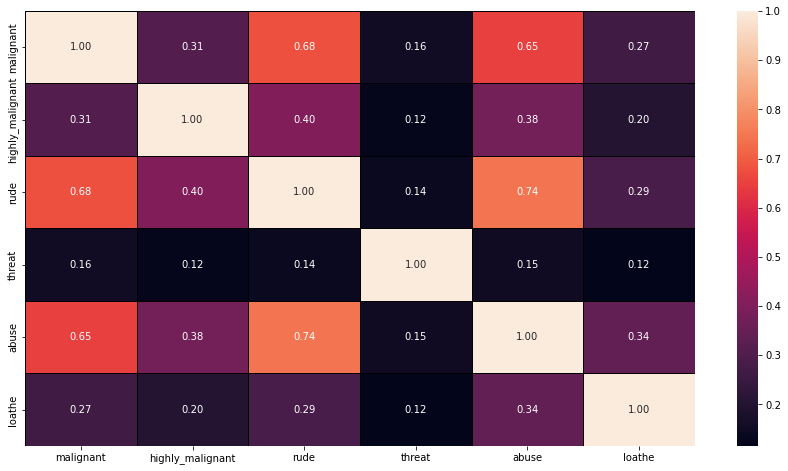

In [9]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

Multicollinearity problem does not exist in this database

In [10]:
df.columns

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [11]:
df.skew()

malignant            2.747567
highly_malignant     9.854083
rude                 3.995704
threat              18.239598
abuse                4.162324
loathe              10.515502
dtype: float64

Not considering skewness of categorical data columns

In [12]:
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,\nMore\nI can't make any real suggestions on i...,0.0,0.0,0.0,0.0,0.0,0.0
4,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0.0,0.0,0.0,0.0,0.0,0.0
159567,You should be ashamed of yourself \n\nThat is ...,0.0,0.0,0.0,0.0,0.0,0.0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0.0,0.0,0.0,0.0,0.0,0.0
159569,And it looks like it was actually you who put ...,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df.isnull().sum()

comment_text        126
malignant           126
highly_malignant    126
rude                126
threat              126
abuse               126
loathe              126
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [16]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [17]:
df = df.astype({'comment_text': str})

In [18]:
print(string.punctuation)
a1 = string.punctuation.replace('\'','') + "0123456789"
print (a1)
b1 = "                                         "
c1 = str.maketrans(a1, b1)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [19]:
comment = df['comment_text']
print(comment.head())

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    \nMore\nI can't make any real suggestions on i...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object


In [20]:
df.columns

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [21]:
label = df[['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']]
print(label.head())

   malignant  highly_malignant  rude  threat  abuse  loathe
0        0.0               0.0   0.0     0.0    0.0     0.0
1        0.0               0.0   0.0     0.0    0.0     0.0
2        0.0               0.0   0.0     0.0    0.0     0.0
3        0.0               0.0   0.0     0.0    0.0     0.0
4        0.0               0.0   0.0     0.0    0.0     0.0


In [22]:
lemmatiser = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sawan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
comment = comment.reset_index()

In [24]:
comment = comment.drop(['index'],axis=1)

In [25]:
comment = comment['comment_text']
comment

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         \nMore\nI can't make any real suggestions on i...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159440    ":::::And for the second time of asking, when ...
159441    You should be ashamed of yourself \n\nThat is ...
159442    Spitzer \n\nUmm, theres no actual article for ...
159443    And it looks like it was actually you who put ...
159444    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159445, dtype: object

In [26]:
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,\nMore\nI can't make any real suggestions on i...,0.0,0.0,0.0,0.0,0.0,0.0
4,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0.0,0.0,0.0,0.0,0.0,0.0
159567,You should be ashamed of yourself \n\nThat is ...,0.0,0.0,0.0,0.0,0.0,0.0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0.0,0.0,0.0,0.0,0.0,0.0
159569,And it looks like it was actually you who put ...,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [28]:
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2-,3}(/\S*)?$','webaddress')

In [29]:
df['comment_text'] = df['comment_text'].str.replace(r'£|\$','dollers')

In [30]:
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [31]:
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?','number')

In [32]:
df['comment_text'] = df['comment_text'].str.replace(r'[^\w\d\s]',' ')

In [33]:
df['comment_text'] = df['comment_text'].str.replace(r'\s+',' ')

In [34]:
df['comment_text'] = df['comment_text'].str.replace(r'^\s+|\s+?$','')

In [35]:
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

df_test['comment_text'] = df_test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2-,3}(/\S*)?$','webaddress')

df_test['comment_text'] = df_test['comment_text'].str.replace(r'£|\$','dollers')

df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

df_test['comment_text'] = df_test['comment_text'].str.replace(r'\d+(\.\d+)?','number')

df_test['comment_text'] = df_test['comment_text'].str.replace(r'[^\w\d\s]',' ')

In [36]:
df_test['comment_text'] = df_test['comment_text'].str.replace(r'\s+',' ')

df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\s+|\s+?$','')

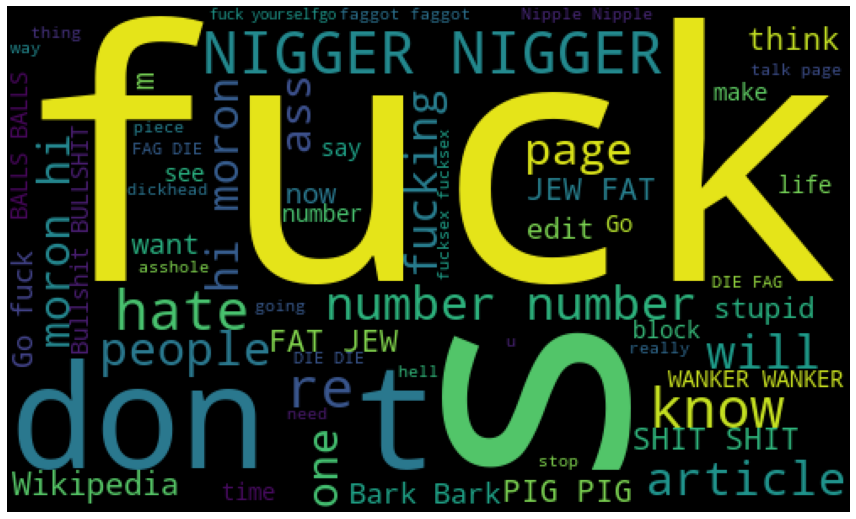

In [37]:
x1 = df['comment_text'][df['malignant']==1]
x2 = WordCloud(width=500, height=300, max_words=60).generate(''.join(x1))
plt.figure(figsize=(12,10))
plt.imshow(x2)
plt.axis('off')
plt.tight_layout()
plt.show()

In [38]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [39]:
df = df.reset_index()

In [ ]:
for i in range(len(df['comment_text'])):
    df['comment_text'][i] = df['comment_text'][i].lower()
    x3 = []
    for i1 in df['comment_text'][i].split():
        x3.append(lemmatizer.lemmatize(i1, pos='v'))
        df['comment_text'][i] = "".join(i1)

In [ ]:
for i in range(len(df_test['comment_text'])):
    df_test['comment_text'][i] = df_test['comment_text'][i].lower()
    x3 = []
    for i1 in df_test['comment_text'][i].split():
        x3.append(lemmatizer.lemmatize(i1, pos='v'))
        df_test['comment_text'][i] = "".join(i1)

In [ ]:
x = df.drop(['Churn'],axis=1)
y = df['Churn']

In [ ]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaling the data

# Model Buidling

# LogisticRegression

In [ ]:
maxAccu =0 
maxRS= 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 106)

In [ ]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))
        
        scr_log = cross_val_score(clf,X_scale,y,cv=5)
        print('Cross Validation Score- ', scr_log.mean())

In [ ]:
log = LogisticRegression()
log.fit(x_train,y_train)

print_score(log,x_train,x_test,y_train,y_test, train=True)
print_score(log,x_train,x_test,y_train,y_test, train=False)

# RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

print_score(rfc,x_train,x_test,y_train,y_test, train=True)
print_score(rfc,x_train,x_test,y_train,y_test, train=False)

# DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

print_score(dtc,x_train,x_test,y_train,y_test, train=True)
print_score(dtc,x_train,x_test,y_train,y_test, train=False)

# GradientBoostingClassifier

In [ ]:
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)

# Support Vector Classifier

In [ ]:
svc = SVC()
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)
print_score(svc,x_train,x_test,y_train,y_test, train=False)

# KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print_score(knn,x_train,x_test,y_train,y_test, train=True)
print_score(knn,x_train,x_test,y_train,y_test, train=False)

# Findings

- LogisticsRegression - Cross Validation Score is 80.10%, Accuracy Score of Train Result is 79.82% and Test Result is 82.17%
- RandomForestClassifier - Cross Validation Score is 79.00%, Accuracy Score of Train Result is 99.77% and Test Result is 80.98%
- DecisionTreeClassifier - Cross Validation Score is 73.13%, Accuracy Score of Train Result is 99.77% and Test Result is 73.99%
- GradientBoostingClassifier - Cross Validation Score is 80.40%, Accuracy Score of Train Result is 82.62% and Test Result is 81.15%
- Support Vector Classifier - Cross Validation Score is 79.96%, Accuracy Score of Train Result is 81.45% and Test Result is 81.60%
- KNeighborsClassifier - Cross Validation Score is 76.47%, Accuracy Score of Train Result is 82.77% and Test Result is 77.57%

##### Choosing Support Vector Classifier model for hyper tuning since the train and test accuracy is high and close to each other

# Hyper Parameter Tuning

In [ ]:
grid_param = {
    'C': range(1,5),
    'gamma':['scale', 'auto'],
    'shrinking': [True,False],
    'probability': [True,False],
}

Selecting Parameters for Hyper Parameter Tuning

In [ ]:
grid_search = GridSearchCV(estimator=svc,
                           param_grid=grid_param,
                           cv=3,
                           n_jobs =-1
                          )

Searching the best grid for the model

In [ ]:
grid_search.fit(x_train,y_train)

Training the model (Note:- Have not added more parameters since it was taking a long time to train and the laptop is not that powerful to load this code hence have removed some parameters)

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

In [ ]:
svc = SVC(C= 1, gamma= 'auto', probability=True, shrinking=True)
svc.fit(x_train,y_train)

Applying best parameters to train the model

In [ ]:
y_pred = svc.predict(x_test)
pred = svc.predict(x_train)

In [ ]:
print(f'Train Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%')
print(f'Test Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(classification_report(y_test, y_pred))

- Previous Train accuracy score - 81.45% and New Train accuracy score - 81.45%
- Previous Test accuracy score - 81.60% and New Test accuracy score - 81.66%

# AUR ROC Curve

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc,x_test,y_test)
plt.title("ROC AUC Curve")
plt.show()

#### Accuracy score of Support Vector Classifier after Tuning the model is 81.66% and AUC score is 81% which is pretty good

## Saving the Model

In [ ]:
file = 'Customer_Churn_Analysis.pickle'
pickle.dump(svc, open(file, 'wb'))